<a href="https://colab.research.google.com/github/edgardbertelli/estudo-pandas/blob/main/Intro_to_data_structures.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

# Series

In [ ]:
s = pd.Series(np.random.randn(5), index=["a", "b", "c", "d", "e"])

In [ ]:
s

a   -2.194656
b   -0.585864
c    0.476615
d   -1.248147
e   -0.121272
dtype: float64

In [ ]:
s.index

Index(['a', 'b', 'c', 'd', 'e'], dtype='object')

In [ ]:
pd.Series(np.random.randn(5))

0   -0.533758
1   -0.214080
2   -0.466334
3   -2.476815
4    0.955076
dtype: float64

In [ ]:
d = {"b": 1, "a": 0, "c": 2}

In [ ]:
pd.Series(d)

b    1
a    0
c    2
dtype: int64

In [ ]:
d = {"a": 0.0, "b": 1.0, "c": 2.0}

In [ ]:
pd.Series(d)

a    0.0
b    1.0
c    2.0
dtype: float64

In [ ]:
pd.Series(d, index=["b", "c", "d", "a"])

b    1.0
c    2.0
d    NaN
a    0.0
dtype: float64

In [ ]:
pd.Series(5.0, index=["a", "b", "c", "d", "e"])

a    5.0
b    5.0
c    5.0
d    5.0
e    5.0
dtype: float64

## Series is ndarray-like

In [ ]:
s[0]

-2.194655669179501

In [ ]:
s[:3]

a   -2.194656
b   -0.585864
c    0.476615
dtype: float64

In [ ]:
s[s > s.median()]

c    0.476615
e   -0.121272
dtype: float64

In [ ]:
s[[4, 3, 1]]

e   -0.121272
d   -1.248147
b   -0.585864
dtype: float64

In [ ]:
np.exp(s)

a    0.111397
b    0.556625
c    1.610614
d    0.287036
e    0.885793
dtype: float64

In [ ]:
s.dtype

dtype('float64')

In [ ]:
s.array

<PandasArray>
[  -2.194655669179501,  -0.5858638362535351,  0.47661531843831867,
  -1.2481471843087644, -0.12127213402569108]
Length: 5, dtype: float64

In [ ]:
s.to_numpy()

array([-2.19465567, -0.58586384,  0.47661532, -1.24814718, -0.12127213])

## Series is dict-like

In [ ]:
s["a"]

-2.194655669179501

In [ ]:
s["e"] = 12.0

In [ ]:
s

a    -2.194656
b    -0.585864
c     0.476615
d    -1.248147
e    12.000000
dtype: float64

In [ ]:
"e" in s

True

In [ ]:
"f" in s

False

In [ ]:
# s["f"]

In [ ]:
s.get("f")

In [ ]:
s.get("f", np.nan)

nan

## Vectorized operations and label alignment with Series

In [ ]:
s + s

a    -4.389311
b    -1.171728
c     0.953231
d    -2.496294
e    24.000000
dtype: float64

In [ ]:
s * 2

a    -4.389311
b    -1.171728
c     0.953231
d    -2.496294
e    24.000000
dtype: float64

In [ ]:
np.exp(s)

a         0.111397
b         0.556625
c         1.610614
d         0.287036
e    162754.791419
dtype: float64

In [ ]:
s[1:] + s[:-1]

a         NaN
b   -1.171728
c    0.953231
d   -2.496294
e         NaN
dtype: float64

## Name attribute

In [ ]:
s = pd.Series(np.random.randn(5), name="something")

In [ ]:
s

0    0.640360
1   -1.245484
2   -0.312503
3    0.138553
4   -0.590234
Name: something, dtype: float64

In [ ]:
s.name

'something'

In [ ]:
s2 = s.rename("different")

In [ ]:
s2.name

'different'

# DataFrame

## From dict of Series or dicts

In [ ]:
d = {
    "one": pd.Series([1.0, 2.0, 3.0], index=["a", "b", "c"]),
    "two": pd.Series([1.0, 2.0, 3.0, 4.0], index=["a", "b", "c", "d"]),
}

In [ ]:
df = pd.DataFrame(d)

In [ ]:
df

,one,two
a,1.0,1.0
b,2.0,2.0
c,3.0,3.0
d,NaN,4.0


In [ ]:
pd.DataFrame(d, index=["d", "b", "a"])

,one,two
d,NaN,4.0
b,2.0,2.0
a,1.0,1.0


In [ ]:
pd.DataFrame(d, index=["d", "b", "a"], columns=["two", "three"])

,two,three
d,4.0,NaN
b,2.0,NaN
a,1.0,NaN


In [ ]:
df.index

Index(['a', 'b', 'c', 'd'], dtype='object')

In [ ]:
df.columns

Index(['one', 'two'], dtype='object')

## From dict of ndarrays / lists

In [ ]:
d = {
    "one": [1.0, 2.0, 3.0, 4.0],
    "two": [4.0, 3.0, 2.0, 1.0]
}

In [ ]:
pd.DataFrame(d)

,one,two
0,1.0,4.0
1,2.0,3.0
2,3.0,2.0
3,4.0,1.0


In [ ]:
pd.DataFrame(d, index=["a", "b", "c", "d"])

,one,two
a,1.0,4.0
b,2.0,3.0
c,3.0,2.0
d,4.0,1.0


## From structured or record array

In [ ]:
data = np.zeros((2,), dtype=[("A", "i4"), ("B", "f4"), ("C", "a10")])

In [ ]:
data[:] = [(1, 2.0, "Hello"), (2, 3.0, "World")]

In [ ]:
pd.DataFrame(data)

,A,B,C
0,1,2.0,b'Hello'
1,2,3.0,b'World'


In [ ]:
pd.DataFrame(data, index=["first", "second"])

,A,B,C
first,1,2.0,b'Hello'
second,2,3.0,b'World'


In [ ]:
pd.DataFrame(data, columns=["C", "A", "B"])

,C,A,B
0,b'Hello',1,2.0
1,b'World',2,3.0


## From a list of dicts

In [ ]:
data2 = [
    {
        "a": 1,
        "b": 2
    },
    {
        "a": 5,
        "b": 10,
        "c": 20
    }
]

In [ ]:
pd.DataFrame(data2)

,a,b,c
0,1,2,NaN
1,5,10,20.0


In [ ]:
pd.DataFrame(data2, index=["first", "second"])

,a,b,c
first,1,2,NaN
second,5,10,20.0


In [ ]:
pd.DataFrame(data2, columns=["a", "b"])

,a,b
0,1,2
1,5,10


## From a dict of tuples

In [ ]:
pd.DataFrame(
    {
        ("a", "b"): {
            ("A", "B"): 1,
            ("A", "C"): 2
        },
        ("a", "a"): {
            ("A", "C"): 3,
            ("A", "B"): 4
        },
        ("a", "c"): {
            ("A", "B"): 5,
            ("A", "C"): 6
        },
        ("b", "a"): {
            ("A", "C"): 7,
            ("A", "B"): 8
        },
        ("b", "b"): {
            ("A", "D"): 9,
            ("A", "B"): 10
        }
    }
)

a              b      
       b    a    c    a     b
A B  1.0  4.0  5.0  8.0  10.0
  C  2.0  3.0  6.0  7.0   NaN
  D  NaN  NaN  NaN  NaN   9.0

## From a Series

In [ ]:
ser = pd.Series(range(3), index=list("abc"), name="ser")

In [ ]:
pd.DataFrame(ser)

,ser
a,0
b,1
c,2


## From a list of namedtuples

In [ ]:
from collections import namedtuple

In [ ]:
Point = namedtuple("Point", "x y")

In [ ]:
pd.DataFrame([Point(0, 0), Point(0, 3), (2, 3)])

,x,y
0,0,0
1,0,3
2,2,3


In [ ]:
Point3D = namedtuple("Point3D", "x y z")

In [ ]:
pd.DataFrame([Point3D(0, 0, 0), Point3D(0, 3, 5), Point(2, 3)])

,x,y,z
0,0,0,0.0
1,0,3,5.0
2,2,3,NaN


## From a list of dataclasses

In [ ]:
from dataclasses import make_dataclass

In [ ]:
Point = make_dataclass("Point", [("x", int), ("y", int)])

In [ ]:
pd.DataFrame([Point(0, 0), Point(0, 3), Point(2, 3)])

,x,y
0,0,0
1,0,3
2,2,3


## Alternate constructors

### DataFrame.from_dict

In [ ]:
pd.DataFrame.from_dict(dict([("A", [1, 2, 3]), ("B", [4, 5, 6])]))

,A,B
0,1,4
1,2,5
2,3,6


In [ ]:
pd.DataFrame.from_dict(
    dict([("A", [1, 2, 3]), ("B", [4, 5, 6])]),
    orient="index",
    columns=["one", "two", "three"],
)

,one,two,three
A,1,2,3
B,4,5,6


### DataFrame.from_records

In [ ]:
data

array([(1, 2., b'Hello'), (2, 3., b'World')],
      dtype=[('A', '<i4'), ('B', '<f4'), ('C', 'S10')])

In [ ]:
pd.DataFrame.from_records(data, index="C")

,A,B
C,,
b'Hello',1,2.0
b'World',2,3.0


## Column selection, addition, deletion

In [ ]:
df["one"]

a    1.0
b    2.0
c    3.0
d    NaN
Name: one, dtype: float64

In [ ]:
df["three"] = df["one"] * df["two"]

In [ ]:
df["flag"] = df["one"] > 2

In [ ]:
df

,one,two,three,flag
a,1.0,1.0,1.0,False
b,2.0,2.0,4.0,False
c,3.0,3.0,9.0,True
d,NaN,4.0,NaN,False


In [ ]:
del df["two"]

In [ ]:
three = df.pop("three")

In [ ]:
df

,one,flag
a,1.0,False
b,2.0,False
c,3.0,True
d,NaN,False


In [ ]:
df["one_trunc"] = df["one"][:2]

In [ ]:
df

,one,flag,one_trunc
a,1.0,False,1.0
b,2.0,False,2.0
c,3.0,True,NaN
d,NaN,False,NaN


In [ ]:
df.insert(1, "bar", df["one"])

In [ ]:
df

,one,bar,flag,one_trunc
a,1.0,1.0,False,1.0
b,2.0,2.0,False,2.0
c,3.0,3.0,True,NaN
d,NaN,NaN,False,NaN


## Assigning new columns in method chains

In [ ]:
iris = pd.read_csv("data/iris.csv")

In [ ]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
iris.assign(sepal_ratio=iris["SepalWidthCm"] / iris["SepalLengthCm"]).head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,sepal_ratio
0,1,5.1,3.5,1.4,0.2,Iris-setosa,0.686275
1,2,4.9,3.0,1.4,0.2,Iris-setosa,0.612245
2,3,4.7,3.2,1.3,0.2,Iris-setosa,0.680851
3,4,4.6,3.1,1.5,0.2,Iris-setosa,0.673913
4,5,5.0,3.6,1.4,0.2,Iris-setosa,0.720000


In [ ]:
iris.assign(sepal_ratio=lambda x: (x["SepalWidthCm"] / x["SepalLengthCm"])).head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,sepal_ratio
0,1,5.1,3.5,1.4,0.2,Iris-setosa,0.686275
1,2,4.9,3.0,1.4,0.2,Iris-setosa,0.612245
2,3,4.7,3.2,1.3,0.2,Iris-setosa,0.680851
3,4,4.6,3.1,1.5,0.2,Iris-setosa,0.673913
4,5,5.0,3.6,1.4,0.2,Iris-setosa,0.720000


<Axes: xlabel='SepalRatio', ylabel='PetalRatio'>

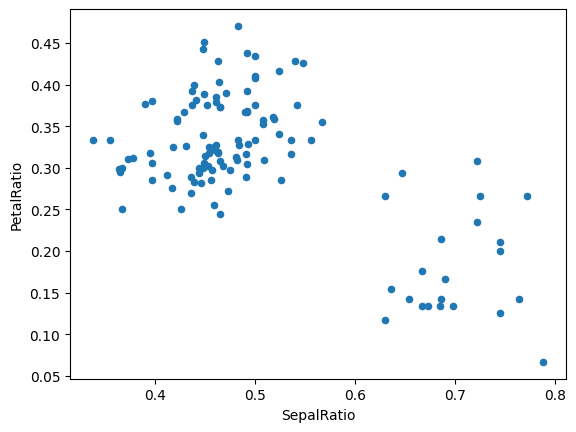

In [ ]:
(
    iris.query("SepalLengthCm > 5")
    .assign(
        SepalRatio=lambda x: x.SepalWidthCm / x.SepalLengthCm,
        PetalRatio=lambda x: x.PetalWidthCm / x.PetalLengthCm,
    )
    .plot(kind="scatter", x="SepalRatio", y="PetalRatio")
)

In [ ]:
dfa = pd.DataFrame(
    {
        "A": [1, 2, 3],
        "B": [4, 5, 6],
    }
)

In [ ]:
dfa.assign(
    C=lambda x: x["A"] + x["B"],
    D=lambda x: x["A"] + x["C"]
)

,A,B,C,D
0,1,4,5,6
1,2,5,7,9
2,3,6,9,12


## Indexing / selection

In [ ]:
df.loc["b"]

one            2.0
bar            2.0
flag         False
one_trunc      2.0
Name: b, dtype: object

In [ ]:
df.iloc[2]

one           3.0
bar           3.0
flag         True
one_trunc     NaN
Name: c, dtype: object

## Data alignment and arithmetic

In [ ]:
df = pd.DataFrame(np.random.randn(10, 4), columns=["A", "B", "C", "D"])

In [ ]:
df2 = pd.DataFrame(np.random.randn(7, 3), columns=["A", "B", "C"])

In [ ]:
df + df2

,A,B,C,D
0,-2.430297,-1.528796,0.188130,NaN
1,0.454649,-1.045621,-0.552897,NaN
2,-0.036684,2.093287,-5.037518,NaN
3,0.376414,1.836856,2.477170,NaN
4,1.839742,0.501760,0.262116,NaN
5,0.006814,0.538051,0.280202,NaN
6,0.347253,3.408902,-3.084175,NaN
7,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN


In [ ]:
df - df.iloc[0]

,A,B,C,D
0,0.000000,0.000000,0.000000,0.000000
1,1.905110,-1.116101,0.275754,1.973337
2,0.348028,2.002127,-1.875273,-1.403728
3,1.586050,2.542423,1.593085,0.344164
4,2.395586,0.823314,0.681931,1.475551
5,2.600688,0.099413,0.474005,2.016882
6,1.888100,2.785946,-0.708652,-0.140192
7,0.152013,1.493037,1.133882,1.885334
8,1.311057,0.834016,-0.048382,1.191395
9,2.082209,0.850975,0.943921,0.830865


In [ ]:
df * 5 + 2

,A,B,C,D
0,-5.694605,-1.933031,-1.390848,-1.293405
1,3.830944,-7.513538,-0.012077,8.573279
2,-3.954465,8.077604,-10.767213,-8.312046
3,2.235642,10.779082,6.574577,0.427417
4,6.283327,2.183540,2.018807,6.084351
5,7.308834,-1.435965,0.979176,8.791004
6,3.745894,11.996699,-4.934109,-1.994365
7,-4.934539,5.532155,4.278565,8.133265
8,0.860681,2.237050,-1.632759,4.663570
9,4.716442,2.321844,3.328757,2.860918


In [ ]:
1 / df

,A,B,C,D
0,-0.649806,-1.271284,-1.474558,-1.518186
1,2.730832,-0.525567,-2.484994,0.760655
2,-0.839706,0.822693,-0.391628,-0.484870
3,21.218606,0.569536,1.092997,-3.179482
4,1.167317,27.242065,265.861900,1.224185
5,0.941826,-1.455195,-4.898005,0.736268
6,2.863863,0.500165,-0.721073,-1.251764
7,-0.721028,1.415566,2.194364,0.815226
8,-4.388586,21.092602,-1.376364,1.877180
9,1.840643,15.535478,3.762915,5.807754


In [ ]:
df ** 4

,A,B,C,D
0,5.608741,0.382851,2.115208e-01,0.188235
1,0.017981,13.106545,2.622399e-02,2.987090
2,2.011366,2.182978,4.251131e+01,18.092529
3,0.000005,9.504220,7.006863e-01,0.009785
4,0.538573,0.000002,2.001592e-10,0.445258
5,1.270915,0.223005,1.737494e-03,3.402952
6,0.014866,15.978885,3.698985e+00,0.407297
7,3.699904,0.249046,4.312861e-02,2.264055
8,0.002696,0.000005,2.786547e-01,0.080533
9,0.087121,0.000017,4.987721e-03,0.000879


In [ ]:
df1 = pd.DataFrame(
    {
        "a": [1, 0, 1],
        "b": [0, 1, 1]
    },
    dtype=bool
)

In [ ]:
df2 = pd.DataFrame(
    {
        "a": [0, 1, 1],
        "b": [1, 1, 0]
    },
    dtype=bool
)

In [ ]:
df1 & df2

,a,b
0,False,False
1,False,True
2,True,False


In [ ]:
df1 | df2

,a,b
0,True,True
1,True,True
2,True,True


In [ ]:
df1 ^ df2

,a,b
0,True,True
1,True,False
2,False,True


In [ ]:
-df1

,a,b
0,False,True
1,True,False
2,False,False


## Transposing

In [ ]:
df[:5].transpose()

,0,1,2,3,4
A,-1.538921,0.366189,-1.190893,0.047128,0.856665
B,-0.786606,-1.902708,1.215521,1.755816,0.036708
C,-0.678170,-0.402415,-2.553443,0.914915,0.003761
D,-0.658681,1.314656,-2.062409,-0.314517,0.816870


## DataFrame interoperability with NumPy functions

In [ ]:
np.exp(df)

,A,B,C,D
0,0.214613,0.455388,0.507545,0.517534
1,1.442227,0.149164,0.668703,3.723469
2,0.303950,3.372049,0.077813,0.127147
3,1.048257,5.788172,2.496564,0.730142
4,2.355294,1.037390,1.003768,2.263405
5,2.891475,0.502986,0.815328,3.889189
6,1.417903,7.384180,0.249868,0.449836
7,0.249847,2.026745,1.577298,3.409798
8,0.796233,1.048552,0.483574,1.703549
9,1.721659,1.066486,1.304411,1.187896


In [ ]:
np.asarray(df)

array([[-1.53892109, -0.78660615, -0.67816952, -0.65868093],
       [ 0.36618874, -1.90270761, -0.4024155 ,  1.31465584],
       [-1.19089309,  1.21552071, -2.5534427 , -2.0624091 ],
       [ 0.04712845,  1.75581647,  0.91491534, -0.3145166 ],
       [ 0.8566654 ,  0.03670794,  0.00376135,  0.81687013],
       [ 1.06176672, -0.68719297, -0.20416477,  1.35820071],
       [ 0.34917874,  1.99933982, -1.38682178, -0.79887292],
       [-1.38690783,  0.70643106,  0.45571296,  1.22665308],
       [-0.22786383,  0.04740999, -0.72655181,  0.53271393],
       [ 0.54328834,  0.0643688 ,  0.26575139,  0.17218361]])

In [ ]:
ser = pd.Series([1, 2, 3, 4])

In [ ]:
np.exp(ser)

0     2.718282
1     7.389056
2    20.085537
3    54.598150
dtype: float64

In [ ]:
ser1 = pd.Series([1, 2, 3], index=["a", "b", "c"])

In [ ]:
ser2 = pd.Series([1, 3, 5], index=["b", "a", "c"])

In [ ]:
ser1

a    1
b    2
c    3
dtype: int64

In [ ]:
ser2

b    1
a    3
c    5
dtype: int64

In [ ]:
np.remainder(ser1, ser2)

a    1
b    0
c    3
dtype: int64

In [ ]:
ser3 = pd.Series([2, 4, 6], index=["b", "c", "d"])

In [ ]:
ser3

b    2
c    4
d    6
dtype: int64

In [ ]:
np.remainder(ser1, ser3)

a    NaN
b    0.0
c    3.0
d    NaN
dtype: float64

In [ ]:
ser = pd.Series([1, 2, 3])

In [ ]:
idx = pd.Index([4, 5, 6])

In [ ]:
np.maximum(ser, idx)

0    4
1    5
2    6
dtype: int64

## Console display

In [ ]:
iris = pd.read_csv("data/iris.csv")

In [ ]:
print(iris)

      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
0      1            5.1           3.5            1.4           0.2   
1      2            4.9           3.0            1.4           0.2   
2      3            4.7           3.2            1.3           0.2   
3      4            4.6           3.1            1.5           0.2   
4      5            5.0           3.6            1.4           0.2   
..   ...            ...           ...            ...           ...   
145  146            6.7           3.0            5.2           2.3   
146  147            6.3           2.5            5.0           1.9   
147  148            6.5           3.0            5.2           2.0   
148  149            6.2           3.4            5.4           2.3   
149  150            5.9           3.0            5.1           1.8   

            Species  
0       Iris-setosa  
1       Iris-setosa  
2       Iris-setosa  
3       Iris-setosa  
4       Iris-setosa  
..              ...  
145  

In [ ]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [ ]:
print(iris.iloc[-20, :12].to_string())

Id                          131
SepalLengthCm               7.4
SepalWidthCm                2.8
PetalLengthCm               6.1
PetalWidthCm                1.9
Species          Iris-virginica


In [ ]:
pd.DataFrame(np.random.randn(3, 12))

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.651334,0.932957,1.146517,1.106068,0.198758,0.477400,1.464989,0.644269,-0.540578,-0.520822,0.277169,-1.768896
1,-0.933773,-2.091922,-0.479462,0.320189,-1.006312,-1.628246,-1.465523,-0.332162,-0.028083,-1.094250,1.546151,-2.451578
2,0.639843,1.025295,-0.596857,-0.115638,-1.027359,0.265634,-0.563755,1.431929,0.135267,-0.112557,-1.506443,0.309793


In [ ]:
pd.set_option("display.width", 40)

In [ ]:
pd.DataFrame(np.random.randn(3, 12))

,0,1,2,3,4,5,6,7,8,9,10,11
0,-0.390655,-0.205203,-0.640263,0.153196,1.799014,-0.559084,0.478591,-1.880618,-0.125292,1.292458,-1.301757,-0.750029
1,-0.438894,0.131070,0.095426,0.779357,1.126672,-1.423974,0.469475,2.824748,-0.491041,1.362748,-0.388388,0.364664
2,-0.391127,-1.363522,-0.798514,0.827401,-1.739503,0.324608,-0.004490,-1.327484,3.561218,1.532387,-1.757312,0.332718


In [ ]:
datafile = {
    "filename": ["filename_01", "filename_02"],
    "path": [
        "media/user_name/storage/folder_01/filename_01",
        "media/user_name/storage/folder_01/filename_02"
    ]
}

In [ ]:
pd.set_option("display.max_colwidth", 30)

In [ ]:
pd.DataFrame(datafile)

,filename,path
0,filename_01,media/user_name/storage/fo...
1,filename_02,media/user_name/storage/fo...


In [ ]:
pd.set_option("display.max_colwidth", 100)

In [ ]:
pd.DataFrame(datafile)

,filename,path
0,filename_01,media/user_name/storage/folder_01/filename_01
1,filename_02,media/user_name/storage/folder_01/filename_02


## DataFrame column attribute access and IPython completion

In [ ]:
df = pd.DataFrame(
    {
        "foo1": np.random.randn(5),
        "foo2": np.random.randn(5)
    }
)

In [ ]:
df

,foo1,foo2
0,0.034841,-0.138127
1,-0.611650,-0.541123
2,-0.268273,-0.226625
3,-0.146199,0.552709
4,-0.586866,1.441452


In [ ]:
df.foo1

0    0.034841
1   -0.611650
2   -0.268273
3   -0.146199
4   -0.586866
Name: foo1, dtype: float64